In [2]:
import tensorflow as tf

X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

2025-10-31 16:31:01.988234: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761939077.923989    3856 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3482 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [3]:
# Above is roughly the same as (above items are int32 and this are int64, but the sequence number are the same):
dataset_2 = tf.data.Dataset.range(10)
dataset_2

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [4]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2025-10-31 16:31:18.103846: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
for item in dataset_2:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


2025-10-31 16:31:18.115143: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
X_nested = {
    "a": ([1, 2, 3], [4, 5, 6]),
    "b": [7, 8, 9],
}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)
for item in dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


# Transformations

In [7]:
# For individual items in each tensor (no batches)
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.filter(lambda x: x < 3)
for item in dataset:
    print(item)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


2025-10-31 16:31:18.180071: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [9]:
dataset = dataset.map(lambda x: x * 2, num_parallel_calls=tf.data.AUTOTUNE)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [10]:
dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 50)
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


In [11]:
for item in dataset.take(2):
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)


2025-10-31 16:31:18.315519: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)


# Shuffling data

In [12]:
dataset = tf.data.Dataset.range(10).repeat(2)
dataset = dataset.shuffle(buffer_size=10, seed=42).batch(7) # Batch before the shuffle will shuffle the entire batch against others (not useful at all).
for item in dataset:
    print(item)

tf.Tensor([5 2 8 1 7 9 2], shape=(7,), dtype=int64)
tf.Tensor([0 0 4 6 9 3 5], shape=(7,), dtype=int64)
tf.Tensor([3 8 4 1 7 6], shape=(6,), dtype=int64)


# Interleaving lines from multiple files

In [13]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


df = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(df.data, df.target.reshape(-1, 1), test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

housing = np.c_[X_train, y_train]
housing = pd.DataFrame(housing)
housing.columns = df.feature_names + df.target_names

housing_test = np.c_[X_test, y_test]
housing_test = pd.DataFrame(housing_test)
housing_test.columns = df.feature_names + df.target_names

housing_valid = np.c_[X_valid, y_valid]
housing_valid = pd.DataFrame(housing_valid)
housing_valid.columns = df.feature_names + df.target_names

In [14]:
housing

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      4.7069      27.0  6.523256   1.116279       873.0  3.383721     38.00   
1      3.8750      15.0  5.058406   1.075770      3359.0  2.651144     34.10   
2      2.8828      26.0  5.290618   1.201373      1273.0  2.913043     33.76   
3      5.0000      34.0  6.474708   1.136187       705.0  2.743191     34.35   
4      5.0371      25.0  6.385656   1.008119      1857.0  2.512855     38.50   
...       ...       ...       ...        ...         ...       ...       ...   
13204  3.3427      16.0  3.748996   1.146586       951.0  1.909639     33.79   
13205  3.6083      16.0  5.720486   0.980903      2279.0  3.956597     38.04   
13206  3.9844      18.0  5.549834   1.014950      1952.0  3.242525     32.74   
13207  4.5112      16.0  4.414286   1.011429       730.0  2.085714     33.84   
13208  4.2000      35.0  4.372093   0.916279       640.0  2.976744     33.91   

       Longitude  MedHouseVal  
0        -120.97        1.769  
1        -117.87        1.733  
2        -117.85        2.047  
3        -119.74        3.294  
4        -121.51        1.802  
...          ...          ...  
13204    -118.29        1.542  
13205    -121.34        1.464  
13206    -116.99        2.153  
13207    -117.87        1.390  
13208    -118.32        1.813  

[13209 rows x 9 columns]

In [15]:
# Separate the dataset into smaller CSVs

import math

def split_dataset_into_multiple_csv(string_type, df, batch_size=1_000):
    batch_size = 1_000
    batches = math.ceil(df.shape[0] / batch_size)
    print(f"Processing {string_type}... Batches = {batches}")
    start = 0
    for index in range(batches):
        batch = index + 1
        end = (batch * batch_size)
        filename = f"datasets/housing/housing_{string_type}_{batch:02d}.csv"
        df[start:end].to_csv(filename, index=False)
        
        start = end

split_dataset_into_multiple_csv("train", housing)
split_dataset_into_multiple_csv("test", housing_test)
split_dataset_into_multiple_csv("valid", housing_valid)

Processing train... Batches = 14
Processing test... Batches = 5
Processing valid... Batches = 4


In [16]:
train_filepaths = [
    "datasets/housing/housing_train_*.csv",
]

valid_filepaths = [
    "datasets/housing/housing_valid_*.csv",
]

test_filepaths = [
    "datasets/housing/housing_valid_*.csv",
]

In [17]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)
filepath_dataset

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [18]:
n_readers = 4 # read 4 files at a time
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1), # Skip header
    cycle_length=n_readers
)

In [19]:
count = 0
for item in dataset:
    count += 1
count

13209

In [20]:
for item in dataset:
    print(item)

tf.Tensor(b'8.6001,15.0,7.138702460850112,1.0782997762863535,930.0,2.0805369127516777,33.61,-117.86,5.00001', shape=(), dtype=string)
tf.Tensor(b'4.7069,27.0,6.523255813953488,1.1162790697674418,873.0,3.383720930232558,38.0,-120.97,1.769', shape=(), dtype=string)
tf.Tensor(b'3.6849,33.0,5.529610829103215,1.0846023688663282,1704.0,2.883248730964467,33.79,-117.97,2.114', shape=(), dtype=string)
tf.Tensor(b'2.7708,34.0,4.345549738219895,1.0785340314136125,1678.0,4.392670157068062,34.09,-118.21,1.482', shape=(), dtype=string)
tf.Tensor(b'2.5074,35.0,4.882154882154882,1.0942760942760943,717.0,2.414141414141414,40.42,-120.66,0.664', shape=(), dtype=string)
tf.Tensor(b'3.875,15.0,5.058405682715075,1.0757695343330702,3359.0,2.6511444356748224,34.1,-117.87,1.733', shape=(), dtype=string)
tf.Tensor(b'4.3636,28.0,6.138020833333333,1.0625,1162.0,3.0260416666666665,34.67,-118.22,1.797', shape=(), dtype=string)
tf.Tensor(b'1.2292,36.0,4.833333333333333,1.0555555555555556,285.0,3.1666666666666665,38.

In [21]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler
import numpy as np

# Here is sort of "hardcoded" the mean and standard deviation because we can have the entire dataset in memory
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)


X_mean = standard_scaler.mean_
X_std = standard_scaler.scale_
n_inputs = 8

def parse_csv_line(line):
    defaults = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)] # 8 default 0s plus an empty value (output) = 9 columns
    fields = tf.io.decode_csv(line, record_defaults=defaults) # Array of tensor where each value corresponds to each csv value

    return tf.stack(fields[:-1]), tf.stack(fields[-1:]) # Group in a tensor with array of values

def preprocess(line):
    X, y = parse_csv_line(line)

    return (X - X_mean) / X_std, y

In [22]:
preprocess(b'8.32,41.0,6.91,1.02,3.0,2.5,37.88,-12.23,4.526')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 2.3552804 ,  0.98758775,  0.7029885 , -0.19507624, -1.2521574 ,
        -0.07719775,  1.0465803 , 53.537754  ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.526], dtype=float32)>)

In [23]:
# Group every above functions into one
def csv_reader_dataset(filepaths, n_readers=5, 
                       n_read_threads=tf.data.AUTOTUNE, n_parse_threads=tf.data.AUTOTUNE, 
                       shuffle_buffer_size=10_000, seed=42, batch_size=32):
    
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads
    )
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)

    return dataset.batch(batch_size).prefetch(1)

In [24]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)
for item in train_set:
    print(item)

(<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[ 1.35497421e-01,  7.49284327e-01,  4.34187919e-01,
         1.99123114e-01, -1.11321604e+00,  5.77541888e-02,
         1.18642405e-01,  3.60716552e-01],
       [-1.11022675e+00,  2.72677511e-01, -8.18844795e-01,
        -1.92506909e-01, -7.42998958e-01,  1.51713982e-01,
        -6.40581012e-01,  5.70172250e-01],
       [-3.98361683e-01, -6.01101637e-01, -2.40393523e-02,
        -1.99483499e-01,  2.28711069e-01, -6.61785081e-02,
         1.42150450e+00, -7.86309183e-01],
       [-6.51083648e-01, -2.03929305e-01, -8.23228478e-01,
        -2.87237465e-01,  1.18635106e+00,  4.32507902e-01,
        -8.98341298e-01,  8.59422743e-01],
       [ 1.09362876e+00, -7.59970605e-01,  2.06707820e-01,
        -9.66077447e-02, -2.34719858e-01, -6.75200820e-02,
        -8.74908864e-01,  7.84616053e-01],
       [-4.87047285e-01, -1.71318424e+00, -2.54828840e-01,
        -9.85564105e-03, -5.52174449e-01, -1.96133107e-02,
        -7.38998294e-01,  1

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="sgd")
model.fit(train_set, validation_data=valid_set, epochs=5)

/home/juliovr/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2025-10-31 16:31:29.422307: I external/local_xla/xla/service/service.cc:163] XLA service 0x74c5c0015b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-31 16:31:29.422323: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-10-31 16:31:29.605540: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-31 16:31:29.887341: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300


     71/Unknown 2s 2ms/step - loss: 1.8291

I0000 00:00:1761939090.679534    4032 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    413/Unknown 3s 3ms/step - loss: 1.2496

2025-10-31 16:31:31.731538: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:31.731565: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114
/home/juliovr/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3140 - val_loss: 111.0082
Epoch 2/5


2025-10-31 16:31:32.502610: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-10-31 16:31:32.502629: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:32.502641: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


404/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5936

2025-10-31 16:31:33.455789: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:33.455825: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7695 - val_loss: 71.8981
Epoch 3/5


2025-10-31 16:31:33.949830: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:33.950048: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1700

2025-10-31 16:31:35.769582: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:35.769623: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4661 - val_loss: 15.8275
Epoch 4/5


2025-10-31 16:31:36.079727: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:36.079761: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3769

2025-10-31 16:31:36.969330: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:36.969350: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0513 - val_loss: 0.5861
Epoch 5/5


2025-10-31 16:31:37.293531: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:37.293597: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4414

2025-10-31 16:31:38.577723: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:38.577751: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4325 - val_loss: 0.5093


2025-10-31 16:31:38.984587: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-10-31 16:31:38.984613: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:38.984630: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


In [26]:
test_mse = model.evaluate(test_set)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5093


2025-10-31 16:31:39.290172: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:31:39.290208: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


In [27]:
new_set = test_set.take(3) # Pretend we have 3 new samples. As the dataset is batched, this take the first 3 batches (of 32 items each), so 32x3 = 96
y_pred = model.predict(new_set)
y_pred.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(96, 1)

In [28]:
first_element = []
for item in test_set.take(1):
    first_element = item[0].numpy()[0]

y_pred = model.predict(tf.convert_to_tensor([first_element]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[3.519929]], dtype=float32)

# TFRecord format

In [29]:
with tf.io.TFRecordWriter("datasets/my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [30]:
filepaths = ["datasets/my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


2025-10-31 16:31:39.995583: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:390] TFRecordDataset `buffer_size` is unspecified, default to 262144


In [31]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("datasets/my_compressed.tfrecord", options) as f:
    f.write(b"Compress, compress, compress!")

In [32]:
dataset = tf.data.TFRecordDataset(["datasets/my_compressed.tfrecord"], compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'Compress, compress, compress!', shape=(), dtype=string)


# Keras preprocessing layers

In [33]:
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
norm_layer.adapt(X_train) # computes the mean and variance of every feature
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.2413 - val_loss: 0.7929
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6124 - val_loss: 0.5791
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5463 - val_loss: 0.5644
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5363 - val_loss: 0.5586
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5298 - val_loss: 0.5525


## Separating the normalization layer and integrating it in the final model

In [34]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
X_train_scaled = norm_layer(X_train)
X_valid_scaled = norm_layer(X_valid)

In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7242 - val_loss: 0.8831
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6974 - val_loss: 0.6683
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6158 - val_loss: 0.6319
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5888 - val_loss: 0.6088
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5703 - val_loss: 0.5917


In [36]:
final_model = tf.keras.Sequential([
    norm_layer,
    model
])
X_new = X_test[:3] # Pretend we have a few new instances (unscaled)
y_pred = final_model(X_new) # Preprocesses the data and makes predictions
y_pred

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.9284029],
       [1.6223844],
       [2.4251559]], dtype=float32)>

# Discretization layer

In [37]:
age = tf.constant([[10.], [93.], [57.], [18.], [37.], [5.]])
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18., 50.])
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [2],
       [2],
       [1],
       [1],
       [0]])>

In [38]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)>

In [39]:
two_age_categories = np.array([[1, 0], [2, 2], [2, 0]])
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]], dtype=float32)>

In [40]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3 + 3)
onehot_layer(two_age_categories + [0, 3]) # adds 3 to the second feature, shifting it into the second group

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

# StringLookup layer

In [41]:
# Basically a hash table
cities = ["Auckland", "Paris", "Paris", "San Francisco"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[1],
       [3],
       [3],
       [0]])>

In [42]:
str_lookup_layer = tf.keras.layers.StringLookup(output_mode="one_hot")
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])>

# Hashing layer (better not to use because of hash collision)

In [43]:
hashing_layer = tf.keras.layers.Hashing(num_bins=10)
hashing_layer([["Paris"], ["Tokyo"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[0],
       [1],
       [9],
       [1]])>

# Embeddings

In [44]:
tf.random.set_seed(42)
embedding_layer = tf.keras.layers.Embedding(input_dim=5, output_dim=2)
embedding_layer(np.array([2, 4, 2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.02211769,  0.00460658],
       [-0.04520656,  0.04133619],
       [ 0.02211769,  0.00460658]], dtype=float32)>

In [45]:
# Combined with StringLookup layer to embed a categorical text attribute
tf.random.set_seed(42)
ocean_prox = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(ocean_prox)
lookup_and_embed = tf.keras.Sequential([
    str_lookup_layer,
    tf.keras.layers.Embedding(input_dim=str_lookup_layer.vocabulary_size(), output_dim=5)
])

In [46]:
lookup_and_embed(np.array([["<1H OCEAN"], ["ISLAND"], ["<1H OCEAN"], ["NOT IN VOCABULARY"]]))

<tf.Tensor: shape=(4, 1, 5), dtype=float32, numpy=
array([[[ 0.01293233,  0.03644517, -0.04667871,  0.02937163,
          0.00900769]],

       [[ 0.01611954,  0.00640595,  0.02885521, -0.00641936,
          0.01035262]],

       [[ 0.01293233,  0.03644517, -0.04667871,  0.02937163,
          0.00900769]],

       [[-0.00988121,  0.0457371 , -0.02687809, -0.04993676,
         -0.04242654]]], dtype=float32)>

# Text preprocessing

In [47]:
train_data = ["to be", "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer = tf.keras.layers.TextVectorization()
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 1, 0, 0],
       [6, 2, 1, 2]])>

In [48]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode="tf_idf")
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.96725637, 0.6931472 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.96725637, 1.3862944 , 0.        , 0.        , 0.        ,
        1.0986123 ]], dtype=float32)>

# Image preprocessing layers

In [49]:
from sklearn.datasets import load_sample_images

images = load_sample_images()["images"]
crop_image_layer = tf.keras.layers.CenterCrop(height=100, width=100)
cropped_images = crop_image_layer(images)

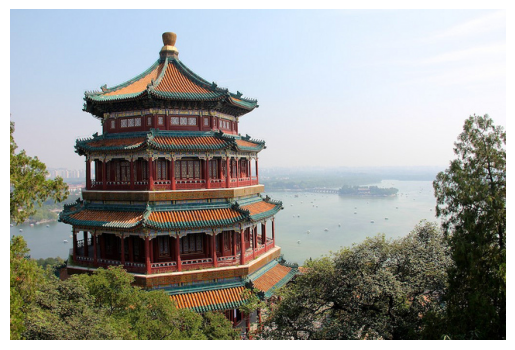

In [50]:
import matplotlib.pyplot as plt

plt.imshow(images[0] / 255.0)
plt.axis("off")
plt.show()

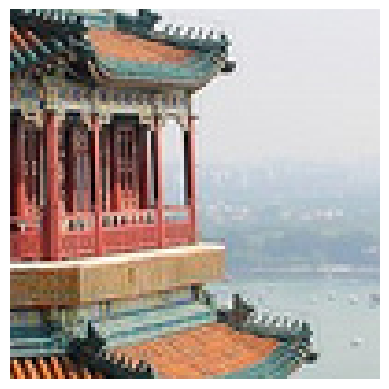

In [51]:
plt.imshow(cropped_images[0] / 255.0)
plt.axis("off")
plt.show()

# Exercises

1. Why would you want to use the tf.data API?<br>
R. To manipulate data for efficiently, which includes load, transform and write datasets. Also, it offers much more functionalities, like preprocess data, load multiple files in parallel, etc.
2. What are the benefits of splitting a large dataset into multiple files?<br>
R. Being able to do offline training when dataset could not fit in memory and also being able to load them in parallel and interleaving.
3. During training, how can you tell that your input pipeline is the bottleneck? What can you do to fix it?<br>
R. 
4. Can you save any binary data to a TFRecord file, or only serialized protocol buffers?<br>
R. Any data, but the preference to use protocol buffers is the standardization.
5. Why would you go through the hassle of converting all your data to the Example protobuf format? Why not use your own protobuf definition?<br>
R. The only reason would be standardization.
6. When using TFRecords, when would you want to activate compression? Why not do it systematically?<br>
R. It's recommended if the data need to feed in or out a network; as the filesize is reduced, would be faster, but at the increasing overhead of compress/decompress the data.
7. Data can be preprocessed directly when writing the data files, or within the tf.data pipeline, or in preprocessing layers within your model. Can you list a few pros and cons of each option?<br>
R. 
8. Name a few common ways you can encode categorical integer features. What about text?<br>
R. With IntegerLookup layer to make onehot encoders. For text, TextVectorization.

## 9

In [61]:
# Get the fashion mnist data

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [79]:
# Create the datasets

train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))
valid_set = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

In [82]:
for (feature, label) in train_set.take(1):
    print(feature)
    print(label)

tf.Tensor(
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0

In [66]:
# Shuffling

train_set = train_set.shuffle(buffer_size=128, seed=42).batch(10)
test_set = test_set.shuffle(buffer_size=128, seed=42).batch(10)
valid_set = valid_set.shuffle(buffer_size=128, seed=42).batch(10)

In [97]:
for (feature, label) in train_set.take(1):
    print(tf.io.serialize_tensor(feature))

tf.Tensor(b'\x08\x04\x12\x08\x12\x02\x08\x1c\x12\x02\x08\x1c"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\rI\x00\x00\x01\x04\x00\x00\x00\x00\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00$\x88\x7f>6\x00\x00\x00\x01\x03\x04\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00f\xcc\xb0\x86\x90{\x17\x00\x00\x00\x00\x0c\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9b\xec\xcf\xb2k\x9c\xa1m@\x17M\x82H\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00E\xcf\xdf\xda\xd8\xd8\xa3\x7fyz\x92\x8dX\xacB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x01\x01\x00\xc8\xe8\xe8\xe9\xe5\xdf\xdf\xd7\xd

In [99]:
def create_example(image_bytes, label):
    feature = {
        'image_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_bytes])),
        'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[label])),
    }
    
    return tf.train.Example(features=tf.train.Features(feature=feature))

for (feature, label) in train_set.take(1):
    with tf.io.TFRecordWriter("train.tfrecord") as f:
        f.write(create_example(tf.io.serialize_tensor(feature).numpy(), label).SerializeToString())

In [102]:
feature_description = {
    "image_raw": tf.io.VarLenFeature(tf.string),
    "label": tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example, feature_description)

dataset = tf.data.TFRecordDataset(["train.tfrecord"]).map(parse)
for item in dataset:
    print(item)

{'image_raw': SparseTensor(indices=tf.Tensor([[0]], shape=(1, 1), dtype=int64), values=tf.Tensor([b'\x08\x04\x12\x08\x12\x02\x08\x1c\x12\x02\x08\x1c"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\rI\x00\x00\x01\x04\x00\x00\x00\x00\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00$\x88\x7f>6\x00\x00\x00\x01\x03\x04\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00f\xcc\xb0\x86\x90{\x17\x00\x00\x00\x00\x0c\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9b\xec\xcf\xb2k\x9c\xa1m@\x17M\x82H\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00E\xcf\xdf\xda\xd8\xd8\xa3\x7fyz\x92\x8dX\xac

In [ ]:
def split_dataset_into_multiple_csv(string_type, df, batch_size=1_000):
    batch_size = 1_000
    batches = math.ceil(df.shape[0] / batch_size)
    print(f"Processing {string_type}... Batches = {batches}")
    start = 0
    for index in range(batches):
        batch = index + 1
        end = (batch * batch_size)
        filename = f"datasets/housing/housing_{string_type}_{batch:02d}.csv"
        df[start:end].to_csv(filename, index=False)
        
        start = end

split_dataset_into_multiple_csv("train", housing)
split_dataset_into_multiple_csv("test", housing_test)
split_dataset_into_multiple_csv("valid", housing_valid)

## 10

In [55]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

base_path = "datasets/aclImdb/"

def download_imdb_data():
    if not Path(base_path).is_dir():
        tarball_path = "datasets/aclImdb_v1.tar.gz"
        
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
        urllib.request.urlretrieve(url, tarball_path)
        
        with tarfile.open(tarball_path) as tarball:
            tarball.extractall(path="datasets")

download_imdb_data()

In [56]:
# Get and split (for test/valid) the filepaths

train_pos_filepaths = [
    base_path + "train/pos/*.txt",
]
train_neg_filepaths = [
    base_path + "train/neg/*.txt",
]

test_pos_filepaths_full = [
    base_path + "test/pos/*.txt",
]
test_neg_filepaths_full = [
    base_path + "test/neg/*.txt",
]

test_pos_filepaths = []
test_neg_filepaths = []
valid_pos_filepaths = []
valid_neg_filepaths = []

filepath_dataset_train_pos = tf.data.Dataset.list_files(train_pos_filepaths, seed=42)
filepath_dataset_train_neg = tf.data.Dataset.list_files(train_neg_filepaths, seed=42)

filepath_dataset_train_pos_full = tf.data.Dataset.list_files(test_pos_filepaths_full, seed=42)
for (index, item) in enumerate(filepath_dataset_train_pos_full):
    if index < 7500:
        valid_pos_filepaths.append(item)
    else:
        test_pos_filepaths.append(item)

filepath_dataset_train_neg_full = tf.data.Dataset.list_files(test_neg_filepaths_full, seed=42)
for (index, item) in enumerate(filepath_dataset_train_neg_full):
    if index < 7500:
        valid_neg_filepaths.append(item)
    else:
        test_neg_filepaths.append(item)


In [57]:
# train_data = ["to be", "!(to be)", "That's the question", "Be, be, be."]
# text_vec_layer = tf.keras.layers.TextVectorization()
# text_vec_layer.adapt(train_data)
# text_vec_layer(["Be good!", "Question: be or be?"])

def dataset_reader(dataset, n_readers=5, 
                   n_read_threads=tf.data.AUTOTUNE, n_parse_threads=tf.data.AUTOTUNE, 
                   shuffle_buffer_size=10_000, seed=42, batch_size=32):
    
    dataset = dataset.interleave(
        lambda filepath: tf.keras.layers.TextVectorization().adapt(filepath),
        cycle_length=n_readers, num_parallel_calls=n_read_threads
    )
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)

    return dataset.batch(batch_size).prefetch(1)


In [58]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="sgd")
model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
    413/Unknown 2s 2ms/step - loss: 1.6462

2025-10-31 16:48:02.251157: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:02.251223: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.6404 - val_loss: 1.1204
Epoch 2/5


2025-10-31 16:48:02.817442: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:02.817506: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6796

2025-10-31 16:48:03.775377: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:03.775410: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5398 - val_loss: 0.4526
Epoch 3/5


2025-10-31 16:48:04.085338: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:04.085362: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


393/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4273

2025-10-31 16:48:05.123416: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:05.123438: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4123 - val_loss: 0.4067
Epoch 4/5


2025-10-31 16:48:05.374701: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:05.374743: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3895

2025-10-31 16:48:06.381388: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:06.381410: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3908 - val_loss: 0.3965
Epoch 5/5


2025-10-31 16:48:06.628698: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:06.628726: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3815

2025-10-31 16:48:07.574869: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:07.574890: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3692 - val_loss: 0.3780


2025-10-31 16:48:07.812892: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 18161096726983870937
2025-10-31 16:48:07.812914: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 6119904307436681114
